In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('STB.csv')
#df1=df.reset_index()['Price']
df=df.reset_index()['Price']
df

0       11750
1       12550
2       12900
3       13300
4       13000
        ...  
1237    27000
1238    27400
1239    27000
1240    27200
1241    27850
Name: Price, Length: 1242, dtype: int64

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 16s 556ms/step - loss: 0.0201 - val_loss: 0.0555
Epoch 2/100
11/11 [==============================] - 4s 318ms/step - loss: 0.0061 - val_loss: 0.0162
Epoch 3/100
11/11 [==============================] - 3s 301ms/step - loss: 0.0020 - val_loss: 0.0265
Epoch 4/100
11/11 [==============================] - 3s 290ms/step - loss: 0.0013 - val_loss: 0.0133
Epoch 5/100
11/11 [==============================] - 3s 296ms/step - loss: 0.0010 - val_loss: 0.0150
Epoch 6/100
11/11 [==============================] - 3s 288ms/step - loss: 9.1201e-04 - val_loss: 0.0219
Epoch 7/100
11/11 [==============================] - 3s 297ms/step - loss: 8.6871e-04 - val_loss: 0.0269
Epoch 8/100
11/11 [==============================] - 3s 297ms/step - loss: 8.6567e-04 - val_loss: 0.0227
Epoch 9/100
11/11 [==============================] - 3s 292ms/step - loss: 8.6860e-04 - val_loss: 0.0203
Epoch 10/100
11/11 [==============================] - 3s 301ms/step - loss

11/11 [==============================] - 3s 280ms/step - loss: 3.1792e-04 - val_loss: 0.0099
Epoch 79/100
11/11 [==============================] - 3s 288ms/step - loss: 3.1075e-04 - val_loss: 0.0090
Epoch 80/100
11/11 [==============================] - 3s 292ms/step - loss: 3.4535e-04 - val_loss: 0.0081
Epoch 81/100
11/11 [==============================] - 3s 287ms/step - loss: 3.3730e-04 - val_loss: 0.0051
Epoch 82/100
11/11 [==============================] - 3s 288ms/step - loss: 3.2136e-04 - val_loss: 0.0093
Epoch 83/100
11/11 [==============================] - 3s 281ms/step - loss: 3.3938e-04 - val_loss: 0.0111
Epoch 84/100
11/11 [==============================] - 3s 283ms/step - loss: 3.4553e-04 - val_loss: 0.0176
Epoch 85/100
11/11 [==============================] - 3s 284ms/step - loss: 3.5027e-04 - val_loss: 0.0215
Epoch 86/100
11/11 [==============================] - 3s 280ms/step - loss: 4.3905e-04 - val_loss: 0.0076
Epoch 87/100
11/11 [==============================] - 3s 28

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

1/1 [==============================] - 0s 97ms/step


In [11]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [12]:
train_size1 = int(0.6 * len(df))
test_size1 = int(0.3 * len(df))

train_data1 = df[:train_size1]
test_data1 = df[train_size1:train_size1+test_size1]
val_data1 = df[train_size1+test_size1:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

x_val1 = np.array(val_data1.index).reshape(-1, 1)
y_val1 = np.array(val_data1)

In [13]:
# 12. Đánh giá độ chính xác thuật toán
#RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val1)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

#MAPE
valid_mape = np.mean(np.abs((y_val1 - y_pred_val) / y_val1)) * 100
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

#MAE
valid_mae = np.mean(np.abs(y_pred_val - y_val1))
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation RMSE: 5098.144611917005
Testing RMSE: 8504.93791642269
Validation MAPE: 19.709913865383815
Testing MAPE: 28.37843695782189
Validation MAE: 4338.430553385417
Testing MAE: 6912.366569239029


In [14]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=65
i=0
while(i<30):

    if(len(temp_input)>65):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.79088765]
66
1 day input [0.58143608 0.59894921 0.64448336 0.63222417 0.60945709 0.61996497
 0.59544658 0.5709282  0.57618214 0.63397548 0.64098074 0.61996497
 0.61646235 0.61996497 0.63222417 0.67250438 0.65499124 0.61996497
 0.59894921 0.63222417 0.60595447 0.62171629 0.59194396 0.60595447
 0.61295972 0.61996497 0.62171629 0.63747811 0.63397548 0.63222417
 0.65499124 0.6619965  0.68126095 0.68651489 0.66374781 0.64273205
 0.65499124 0.65323993 0.65323993 0.65849387 0.67075306 0.64448336
 0.65148862 0.65148862 0.63747811 0.64448336 0.64098074 0.63922942
 0.62171629 0.63397548 0.62521891 0.63047285 0.62521891 0.61821366
 0.64273205 0.64623468 0.66725044 0.66900175 0.68301226 0.69001751
 0.70402802 0.69001751 0.69702277 0.71978984 0.79088765]
1 day output [[0.8248218]]
2 day input [0.59894921 0.64448336 0.63222417 0.60945709 0.61996497 0.59544658
 0.5709282  0.57618214 0.63397548 0.64098074 0.61996497 0.61646235
 0.61996497 0.63222417 0.67250438 0.65499124 0.61996497 0.59894921
 0.63

12 day output [[1.3959087]]
13 day input [0.61646235 0.61996497 0.63222417 0.67250438 0.65499124 0.61996497
 0.59894921 0.63222417 0.60595447 0.62171629 0.59194396 0.60595447
 0.61295972 0.61996497 0.62171629 0.63747811 0.63397548 0.63222417
 0.65499124 0.6619965  0.68126095 0.68651489 0.66374781 0.64273205
 0.65499124 0.65323993 0.65323993 0.65849387 0.67075306 0.64448336
 0.65148862 0.65148862 0.63747811 0.64448336 0.64098074 0.63922942
 0.62171629 0.63397548 0.62521891 0.63047285 0.62521891 0.61821366
 0.64273205 0.64623468 0.66725044 0.66900175 0.68301226 0.69001751
 0.70402802 0.69001751 0.69702277 0.71978984 0.79088765 0.82482183
 0.87276697 0.92588401 0.98014748 1.03369534 1.08565319 1.13589919
 1.18501103 1.23412204 1.28468299 1.33818507 1.39590871]
13 day output [[1.458732]]
14 day input [0.61996497 0.63222417 0.67250438 0.65499124 0.61996497 0.59894921
 0.63222417 0.60595447 0.62171629 0.59194396 0.60595447 0.61295972
 0.61996497 0.62171629 0.63747811 0.63397548 0.63222417 0.

24 day output [[2.3828943]]
25 day input [0.61295972 0.61996497 0.62171629 0.63747811 0.63397548 0.63222417
 0.65499124 0.6619965  0.68126095 0.68651489 0.66374781 0.64273205
 0.65499124 0.65323993 0.65323993 0.65849387 0.67075306 0.64448336
 0.65148862 0.65148862 0.63747811 0.64448336 0.64098074 0.63922942
 0.62171629 0.63397548 0.62521891 0.63047285 0.62521891 0.61821366
 0.64273205 0.64623468 0.66725044 0.66900175 0.68301226 0.69001751
 0.70402802 0.69001751 0.69702277 0.71978984 0.79088765 0.82482183
 0.87276697 0.92588401 0.98014748 1.03369534 1.08565319 1.13589919
 1.18501103 1.23412204 1.28468299 1.33818507 1.39590871 1.45873201
 1.52703321 1.60068905 1.67916846 1.76167583 1.84730959 1.93518651
 2.02450752 2.114568   2.20473027 2.29437923 2.38289428]
25 day output [[2.4696352]]
26 day input [0.61996497 0.62171629 0.63747811 0.63397548 0.63222417 0.65499124
 0.6619965  0.68126095 0.68651489 0.66374781 0.64273205 0.65499124
 0.65323993 0.65323993 0.65849387 0.67075306 0.64448336 0

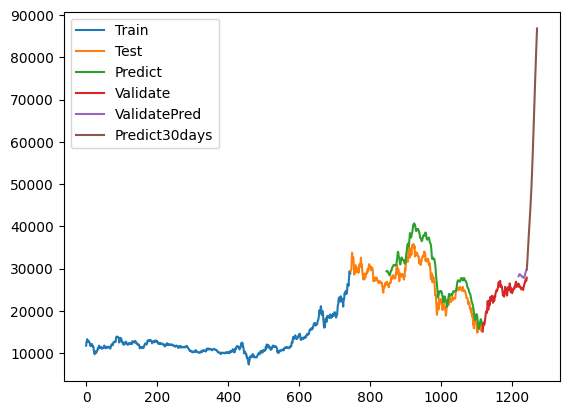

In [15]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))

val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()